<a href="https://colab.research.google.com/github/EronDS/Bioinformatics/blob/main/Tools_for_Bioinformatics/MendelianInheritance/IndependentAssortment(First_Law).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math 
import numpy as np
import collections
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chi2, chisquare
warnings.filterwarnings('ignore')

k = ['#004c6d','#6996b3' , '#c1e7ff']
sns.set_style('whitegrid')

In [2]:
random.choice('Aa')

'A'

In [3]:
def IndependantSegregation(p1 = 'AA' , p2 = 'aa' , n_f1 = 320 , n_f2 =1000):
    p1 = list(p1)
    p2 = list(p2)

    f1 = [0] * n_f1 

    for i in range(n_f1):
        f1[i] = random.choice(p1) + random.choice(p2)
    
    f2 = [0] * n_f2
    f1_pool = list('Aa')

    for u in range(n_f2):
        f2[u] = random.choice(f1_pool) + random.choice(f1_pool)
    return f1,f2

In [4]:
f1,f2 = IndependantSegregation()

In [5]:
def allele_counter(gen):
    allele_freq = {'AA': 0 , 'Aa':0 , 'aa':0}
    AA_count, Aa_count, aa_count = 0 , 0 , 0

    for i in range(len(gen)):
        if gen[i] == 'AA':
            AA_count += 1
        if gen[i] == 'aa':
            aa_count += 1
        if gen[i] == 'Aa':
            Aa_count += 1
        if gen[i] == 'aA':
            Aa_count += 1
    
    allele_freq['AA'] = AA_count
    allele_freq['Aa'] = Aa_count
    allele_freq['aa'] = aa_count
    return allele_freq

In [6]:
f1_allele_freq = allele_counter(f1)
f2_allele_freq = allele_counter(f2)

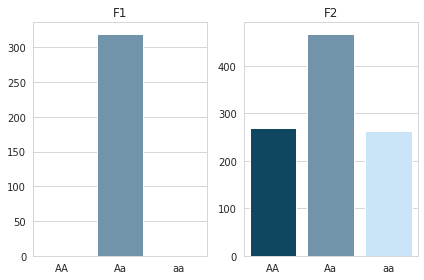

In [7]:

f1_alleles =list(f1_allele_freq.keys())
f1_freqs = list(f1_allele_freq.values())

plt.subplot(1,2,1)
sns.barplot(f1_alleles,f1_freqs, palette = k ).set_title('F1')

f2_alleles = list(f2_allele_freq.keys())
f2_freqs = list(f2_allele_freq.values())

plt.subplot(1,2,2)
sns.barplot(f2_alleles,f2_freqs, palette = k).set_title('F2')
plt.tight_layout()

## χ² test

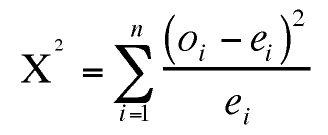

In [8]:
f2_allele_freq
f2_allele_perc = []

for i in f2_allele_freq.values():
    f2_allele_perc.append(i / sum(f2_allele_freq.values()))

In [9]:
list(f2_allele_freq.values())

[269, 468, 263]

In [10]:
print(f2_allele_freq)
print(f2_allele_perc)
phenotype1 = list(f2_allele_freq.values())[0] + list(f2_allele_freq.values())[1]
phenotype2 = list(f2_allele_freq.values())[2]


phenotype1_perc = f2_allele_perc[0] + f2_allele_perc[1]
phenotype2_perc = f2_allele_perc[2]
print('Distribution of Phenotype 1 (AA e Aa) : {}'.format(phenotype1))
print('Distribution of Phenotype 2 (aa) : {}'.format(phenotype2))

print('Frequency of Phenotype 1 (AA e Aa) : {}'.format(phenotype1_perc))
print('Frequency of Phenotype 2 (aa) : {}'.format(phenotype2_perc))

f2_population = sum(list(f2_allele_freq.values()))
print('F1 Population: {}'.format(f2_population))

{'AA': 269, 'Aa': 468, 'aa': 263}
[0.269, 0.468, 0.263]
Distribution of Phenotype 1 (AA e Aa) : 737
Distribution of Phenotype 2 (aa) : 263
Frequency of Phenotype 1 (AA e Aa) : 0.7370000000000001
Frequency of Phenotype 2 (aa) : 0.263
F1 Population: 1000



Ho = The phenotypic segregation observed in the F2 generation follows the 3:1 ratio

H1 = The phenotypic segregation observed in the F2 generation does not follow the 3:1 ratio

alpha = .05, df = 1

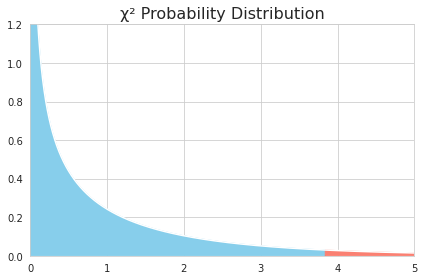

In [11]:
x = np.arange(0,10,0.001)
plt.plot(x, chi2.pdf(x, df = 1),
         color = 'white') # df = number_of_classes(phenotypes) - 1 
plt.title('χ² Probability Distribution', fontsize = 16, loc = 'center')
plt.ylim(0,1.2)
plt.xlim(0,5)
plt.fill_between(x[:3840], chi2.pdf(x,df = 1)[:3840], color = 'skyblue')
plt.fill_between(x[3840:], chi2.pdf(x, df =1)[3840:], color = 'salmon')
plt.tight_layout()

In [12]:
print(chisquare(f_obs = [phenotype1,phenotype2],f_exp = [0.75 * f2_population,0.25 * f2_population]))
# Rejeita Hipotese 1
# H1 Rejected 

Power_divergenceResult(statistic=0.9013333333333333, pvalue=0.34242444692165286)


In [13]:
def rc1_rc2(f1,p1 = 'AA' , p2 = 'aa'):
    rc1, rc2 = [] , []


    for i in range(len(f1)):
        rc1.append(random.choice(f1[i]) + random.choice(p1))
        rc2.append(random.choice(f1[i]) + random.choice(p2))
    
    rc1 = allele_counter(rc1)
    rc2 = allele_counter(rc2)

    rc1_phenotypes = {'phenotype1': 0, 'phenotype2':0}
    rc1_phenotypes['phenotype1'] = rc1['AA'] + rc1['Aa']
    rc1_phenotypes['phenotype2'] = rc1['aa']
    
    rc2_phenotypes = {'phenotype1': 0, 'phenotype2':0}
    rc2_phenotypes['phenotype1'] = rc2['AA'] + rc2['Aa']
    rc2_phenotypes['phenotype2'] = rc2['aa']

    return rc1,rc2, rc1_phenotypes, rc2_phenotypes


In [14]:
f1_population = 320

In [15]:
rc1,rc2, rc1_phe,rc2_phe = rc1_rc2(f1=f1)

print('RC1 : {}'.format(rc1))
print('RC2 : {}'.format(rc2))
print('RC1 Phenotypes: {}'.format(rc1_phe))
print('RC2 Phenotypes: {}'.format(rc2_phe))

RC1 : {'AA': 147, 'Aa': 173, 'aa': 0}
RC2 : {'AA': 0, 'Aa': 160, 'aa': 160}
RC1 Phenotypes: {'phenotype1': 320, 'phenotype2': 0}
RC2 Phenotypes: {'phenotype1': 160, 'phenotype2': 160}


Ho = A segregação fenotípica observada na geração RC2 segue a proporção 1:1

H1 = A segregação fenotípica observada na geração RC2 não segue a proporção 1:1

alpha = .05, df = 1

In [16]:
print(chisquare(f_obs = [rc2_phe['phenotype1'],rc2_phe['phenotype2']],f_exp = [.5 * f1_population,0.5* f1_population]))
# Rejeita Hipotese 1
# H1 Rejected 

Power_divergenceResult(statistic=0.0, pvalue=1.0)


([], <a list of 0 Text major ticklabel objects>)

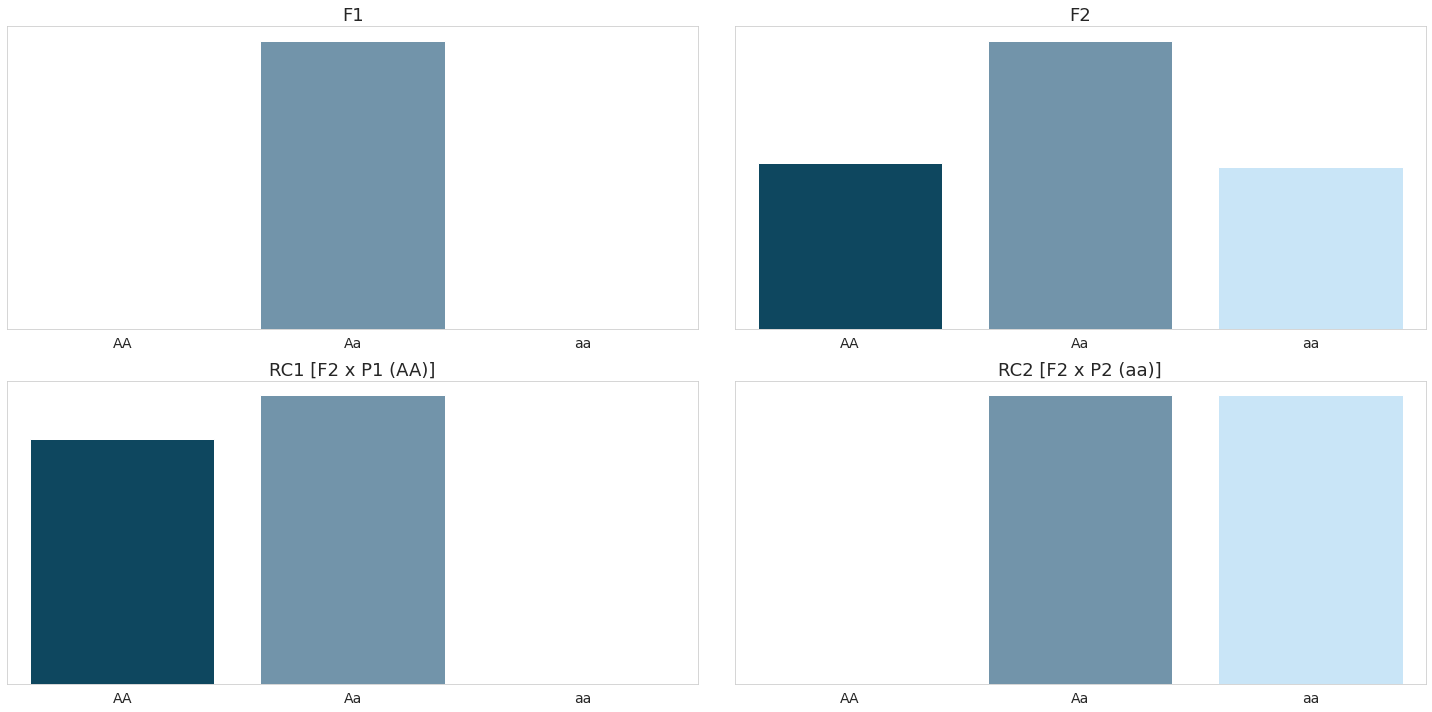

In [17]:
plt.figure(figsize = (20,10))

f1_alleles =list(f1_allele_freq.keys())
f1_freqs = list(f1_allele_freq.values())

rc1_alleles = list(rc1.keys())
rc1_freqs = list(rc1.values())

rc2_alleles = list(rc2.keys())
rc2_freqs = list(rc2.values())

plt.subplot(2,2,1)

sns.barplot(f1_alleles,f1_freqs, palette = k).set_title('F1', fontsize = 18)
plt.yticks([])
plt.xticks(fontsize = 14)


f2_alleles = list(f2_allele_freq.keys())
f2_freqs = list(f2_allele_freq.values())

plt.subplot(2,2,2)
sns.barplot(f2_alleles,f2_freqs, palette = k).set_title('F2', fontsize = 18)
plt.yticks([])
plt.xticks(fontsize = 14)


plt.subplot(2,2,3)
sns.barplot(rc1_alleles,rc1_freqs, palette = k).set_title('RC1 [F2 x P1 (AA)]',fontsize = 18)
plt.yticks([])
plt.xticks(fontsize = 14)

plt.subplot(2,2,4)

sns.barplot(rc2_alleles,rc2_freqs, palette = k).set_title('RC2 [F2 x P2 (aa)]',fontsize = 18)
plt.tight_layout()
plt.xticks(fontsize = 14)
plt.yticks([])
